In [1]:
import pandas as pd

In [2]:
import sys
import os
sys.path.append(os.path.abspath("../scripts"))

In [3]:
from data_preprocessing import *

In [4]:
df=pd.read_csv('../Data/cleaned_data.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22372\934967411.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../Data/cleaned_data.csv')


In [5]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
from encoding_cat import *

In [7]:
feature_engineer = FeatureEngineering(df, target_variable="TotalClaims")

In [8]:
feature_engineer.create_vehicle_age()

In [22]:
cols_to_drop = ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'PostalCode', 'Title', 'Bank','NumberOfVehiclesInFleet','Country','MaritalStatus','Gender','Language','Citizenship']
feature_engineer.drop_unnecessary_columns(cols_to_drop)

Dropping columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'PostalCode', 'Title', 'Bank', 'NumberOfVehiclesInFleet', 'Country', 'MaritalStatus', 'Gender', 'Language', 'Citizenship']


In [10]:
feature_engineer.encode_high_cardinality()

Encoding Model using target encoding (high cardinality: 411 unique values)
Encoding VehicleIntroDate using target encoding (high cardinality: 174 unique values)
Encoding CapitalOutstanding using target encoding (high cardinality: 1011 unique values)


In [11]:
location_cols = ['MainCrestaZone', 'SubCrestaZone', 'Province']
feature_engineer.frequency_encode(location_cols)

In [23]:
categorical_cols = ['AccountType','Product','StatutoryRiskType','Section','VehicleType','make','ItemType','LegalType']
feature_engineer.label_encode(categorical_cols)

Encoding AccountType using Label Encoding
Encoding Product using Label Encoding
Encoding StatutoryRiskType using Label Encoding
Encoding Section using Label Encoding
Encoding VehicleType using Label Encoding
Encoding make using Label Encoding
Encoding ItemType using Label Encoding
Encoding LegalType using Label Encoding


In [14]:
skewed_cols = ['TotalClaims', 'TotalPremium']
feature_engineer.log_transform(skewed_cols)

c:\Users\lenovo\OneDrive\Desktop\10Academy Files\week_3\Alpha_care\new3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
feature_engineer.create_interaction_features()

c:\Users\lenovo\OneDrive\Desktop\10Academy Files\week_3\Alpha_care\scripts\encoding_cat.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df['PremiumPerInsured'].replace([float('inf'), -float('inf')], 0, inplace=True)
c:\Users\lenovo\OneDrive\Desktop\10Academy Files\week_3\Alpha_care\scripts\encoding_cat.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becau

In [15]:
binary_cols = ['NewVehicle', 'TrackingDevice', 'WrittenOff', 'Rebuilt', 'Converted']
processed_df=feature_engineer.binary_encode(binary_cols)

Handling non-binary values in column: NewVehicle
Handling non-binary values in column: TrackingDevice
Handling non-binary values in column: WrittenOff
Handling non-binary values in column: Rebuilt
Handling non-binary values in column: Converted
Feature engineering complete.


In [18]:
missing_cols = df.columns[df.isnull().any()].tolist()
feature_engineer.handle_missing_values(missing_cols)

In [24]:
processed_df.head()

,IsVATRegistered,LegalType,AccountType,Province,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,make,...,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,VehicleAge,PremiumPerInsured,ClaimRatio,PremiumPerClaim
0,True,0,0,0.393826,0.042164,0.042164,0,44069150.0,4,28,...,1,2,Commercial,0,21.929825,0.0,21,2500.000000,0.0,2.192982e+06
1,True,0,0,0.393826,0.042164,0.042164,0,44069150.0,4,28,...,1,2,Commercial,0,21.929825,0.0,21,2500.000000,0.0,2.192982e+06
2,True,0,0,0.393826,0.042164,0.042164,0,44069150.0,4,28,...,1,2,Commercial,0,0.000000,0.0,21,2500.000000,0.0,0.000000e+00
3,True,0,0,0.393826,0.042164,0.042164,0,44069150.0,4,28,...,1,2,Commercial,0,512.848070,0.0,21,0.004901,0.0,5.128481e+07
4,True,0,0,0.393826,0.042164,0.042164,0,44069150.0,4,28,...,1,2,Commercial,0,0.000000,0.0,21,0.004901,0.0,0.000000e+00


In [21]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 43 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   IsVATRegistered           1000098 non-null  bool   
 1   LegalType                 1000098 non-null  object 
 2   AccountType               1000098 non-null  int64  
 3   Province                  1000098 non-null  float64
 4   MainCrestaZone            1000098 non-null  float64
 5   SubCrestaZone             1000098 non-null  float64
 6   ItemType                  1000098 non-null  object 
 7   mmcode                    1000098 non-null  float64
 8   VehicleType               1000098 non-null  object 
 9   make                      1000098 non-null  object 
 10  Model                     1000098 non-null  float64
 11  Cylinders                 1000098 non-null  float64
 12  cubiccapacity             1000098 non-null  float64
 13  kilowatts                 1

In [25]:
processed_df.head()

,IsVATRegistered,LegalType,AccountType,Province,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,make,...,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,VehicleAge,PremiumPerInsured,ClaimRatio,PremiumPerClaim
0,True,0,0,0.393826,0.042164,0.042164,0,44069150.0,4,28,...,1,2,Commercial,0,21.929825,0.0,21,2500.000000,0.0,2.192982e+06
1,True,0,0,0.393826,0.042164,0.042164,0,44069150.0,4,28,...,1,2,Commercial,0,21.929825,0.0,21,2500.000000,0.0,2.192982e+06
2,True,0,0,0.393826,0.042164,0.042164,0,44069150.0,4,28,...,1,2,Commercial,0,0.000000,0.0,21,2500.000000,0.0,0.000000e+00
3,True,0,0,0.393826,0.042164,0.042164,0,44069150.0,4,28,...,1,2,Commercial,0,512.848070,0.0,21,0.004901,0.0,5.128481e+07
4,True,0,0,0.393826,0.042164,0.042164,0,44069150.0,4,28,...,1,2,Commercial,0,0.000000,0.0,21,0.004901,0.0,0.000000e+00


In [20]:
numerical_cols

Index(['Language', 'AccountType', 'MaritalStatus', 'Province',
       'MainCrestaZone', 'SubCrestaZone', 'mmcode', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'VehicleIntroDate',
       'CustomValueEstimate', 'CapitalOutstanding', 'NumberOfVehiclesInFleet',
       'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims',
       'VehicleAge'],
      dtype='object')

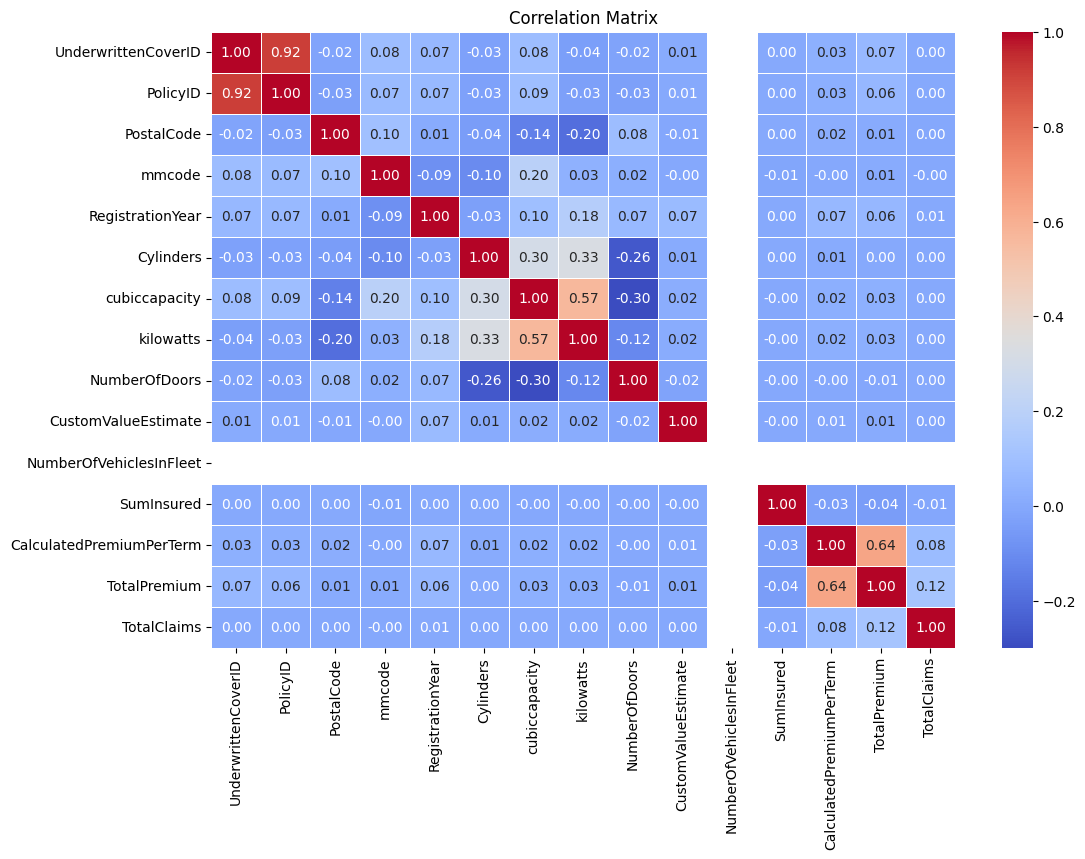

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
"""Plots the correlation matrix as a heatmap"""
numerical_df =df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()